In [1]:
import numpy as np
X=np.array([[1,3,5,7,9,13,20,20,21,24,26],[5,7,11,14,15,17,18,19,21,22,26]])
print(X)
X=X.T

[[ 1  3  5  7  9 13 20 20 21 24 26]
 [ 5  7 11 14 15 17 18 19 21 22 26]]


[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


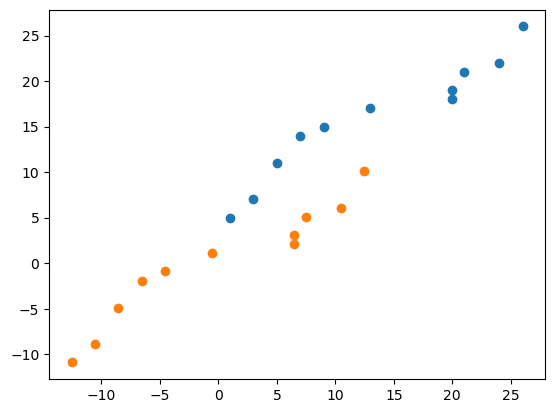

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,-1])
X_mean=X-np.mean(X,axis=0)
print(X_mean)
plt.scatter(X_mean[:,0],X_mean[:,-1])

In [49]:
# to find the covariance matrix there is a simple numpy function
C=np.cov(X_mean,rowvar=False)
#the use of rowvar here is that if rowvar=False it means the columns is to be taken as variable
#else it takes each row as a independent variable which is not correct in this case
eigenvalue,eigenvector=np.linalg.eig(C)
print(eigenvalue)
print(eigenvector)
#therefore the first eigenvector is to be taken 
#this sorts the eigenvalues and the eigenvectors in descending order
sorted_index=np.argsort(eigenvalue)[::-1]#returns the index of the largest element in the eigenvalue array
sorted_eigenvalue=eigenvalue[sorted_index]
sorted_eigenvector=eigenvector[:,sorted_index]

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [59]:
# to select k features from n features, let
n=1
evec_subset=sorted_eigenvector[:,0:n]
eval_subset=sorted_eigenvalue[0:n]
print(eval_subset)
print(evec_subset)

[119.29375452]
[[0.81956216]
 [0.57299028]]


In [63]:
X_reduced=np.dot(evec_subset.T,X_mean.T).T
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [69]:
#the same can be done in a very efficient way using sklearn
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(X_mean)
X_reduced=pca.transform(X_mean)
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]
